In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('3.concertriccir2.csv')

In [3]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [5]:
df['X'] = df['7.003345706103683010e-01']
df['Y'] = df['-2.470675778972781789e-01']
df['Class'] = df['0.000000000000000000e+00']

In [6]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00,X,Y,Class
0,-3.950019,2.740080,1.0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0,-1.724979,3.463930,1.0


In [7]:
df.drop(columns=['7.003345706103683010e-01','-2.470675778972781789e-01','0.000000000000000000e+00'],inplace=True)

In [8]:
df.head()

,X,Y,Class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [9]:
new_row = pd.DataFrame({'X':[0.70],'Y':[-0.247],'Class':[0.0]})

In [11]:
df = pd.concat([df,new_row],axis=0)

In [13]:
df.head()

,X,Y,Class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [14]:
df.shape

(500, 3)

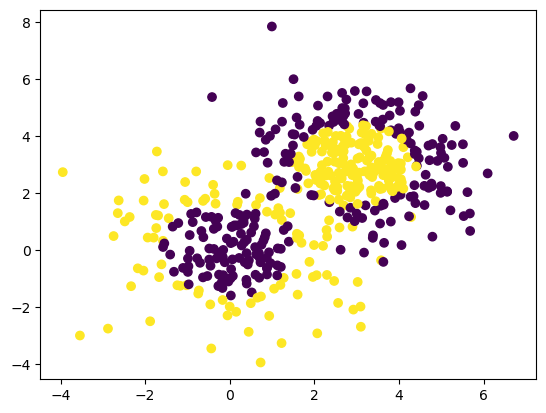

In [16]:
plt.scatter(df['X'],df['Y'],c=df['Class'])

In [17]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [19]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 35ms/step - loss: 0.6979 - accuracy: 0.4825 - val_loss: 0.6930 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5075 - val_loss: 0.6933 - val_accuracy: 0.4300
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5425 - val_loss: 0.6935 - val_accuracy: 0.4300
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5400 - val_loss: 0.6937 - val_accuracy: 0.4300
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5375 - val_loss: 0.6939 - val_accuracy: 0.4300
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5375 - val_loss: 0.6940 - val_accuracy: 0.4300
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5350 - val_loss: 0.6943 - val_accuracy: 0.4300
Epoch 8/200


In [22]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable pa

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)